# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

## Loading the dataset

In [5]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing images
images_path = '/content/drive/MyDrive/colabnotebooks/cnn_cv_plants/images.npy'
images = np.load(images_path)


In [7]:
# Importing labels
labels_path = '/content/drive/MyDrive/colabnotebooks/cnn_cv_plants/Labels.csv'
labels = pd.read_csv(labels_path)


## Data Overview

### Understand the shape of the dataset

In [8]:
# Checking the shape of the images
print("Shape of images:", images.shape)

# Displaying the first few rows of the labels dataframe
print("First few rows of labels:")
print(labels.head())
print(labels.tail())

Shape of images: (4750, 128, 128, 3)
First few rows of labels:
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill
                 Label
4745  Loose Silky-bent
4746  Loose Silky-bent
4747  Loose Silky-bent
4748  Loose Silky-bent
4749  Loose Silky-bent


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

<ipython-input-9-cf57b3835325>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


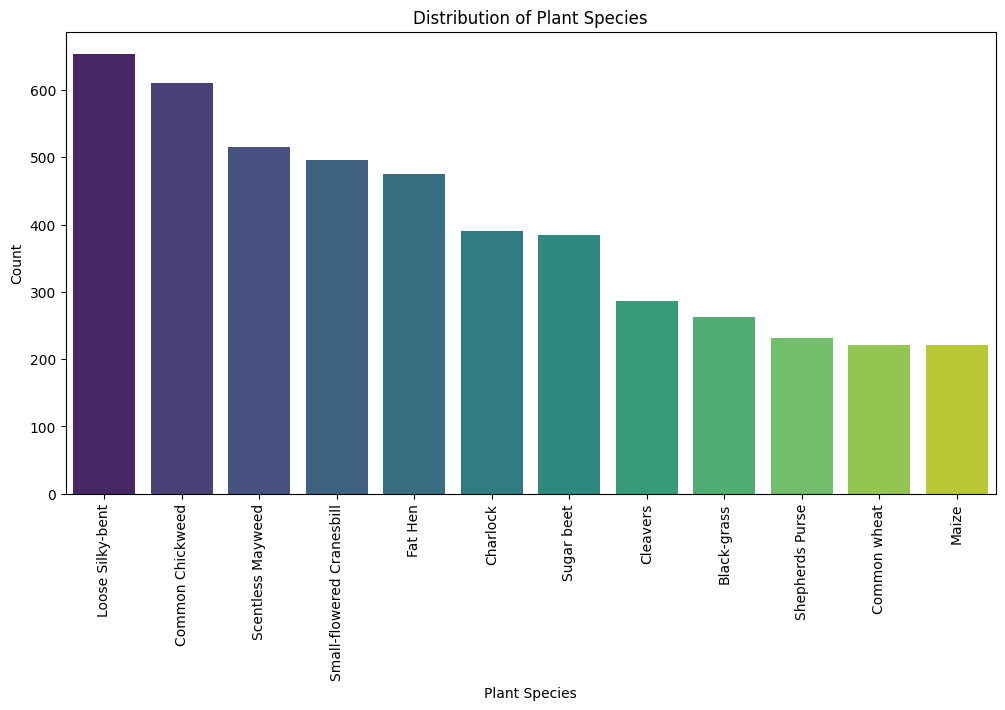

In [9]:
# Count the occurrences of each label
label_counts = labels['Label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Uneven distribution with Loose Silky-bent and Common Chickwee above 600 observations and the bottom five species with observations below 300 observations. Need to watch the results to see if the model overtrains on the high observation species

In [10]:
# Print basic statistics
print("Label Counts:\n", label_counts)
print("\nMean count:", label_counts.mean())
print("Median count:", label_counts.median())
print("Standard Deviation:", label_counts.std())

Label Counts:
 Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

Mean count: 395.8333333333333
Median count: 387.5
Standard Deviation: 154.22288082414025


In [11]:
# Displaying a few images from each class
num_classes = len(labels['Label'].unique())
samples_per_class = 3  # Number of samples to display for each class

fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(samples_per_class * 3, num_classes * 3))

for class_idx, class_label in enumerate(labels['Label'].unique()):
    class_images = images[labels['Label'] == class_label]
    for i in range(samples_per_class):
        ax = axes[class_idx, i]
        ax.imshow(class_images[i])
        ax.axis('off')
        if i == 0:
            ax.set_ylabel(class_label, rotation=0, labelpad=75, size='large')
        ax.set_title(class_label)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Three image samples of each species. Black-grass and Loose Silky-bent look very similar and I will watch the model to see if the observation imbalance between the two creates an issue.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [12]:
# Function to convert BGR to RGB
def bgr_to_rgb(images):
    return np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images])

# Convert the images
images_rgb = bgr_to_rgb(images)

# Verify the conversion by displaying the min and max values of the first image in RGB format
print("First image (BGR to RGB) - Min and Max values:")
print(images_rgb[0].min(), images_rgb[0].max())


First image (BGR to RGB) - Min and Max values:
2 167


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
# Function to resize images
def resize_images(images, size=(64, 64)):
    return np.array([cv2.resize(image, size) for image in images])

# Resize the images
images_resized = resize_images(images_rgb, size=(64, 64))

# Verify the resizing by displaying the shape of the first image
print("Shape of the first resized image:", images_resized[0].shape)


Shape of the first resized image: (64, 64, 3)


### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_resized, labels['Label'], test_size=0.2, random_state=42, stratify=labels['Label'])

# Print the shape of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (3800, 64, 64, 3) (3800,)
Validation set shape: (950, 64, 64, 3) (950,)


<ipython-input-15-8e9ccde2867f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette="viridis")
<ipython-input-15-8e9ccde2867f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_label_counts.index, y=val_label_counts.values, palette="viridis")


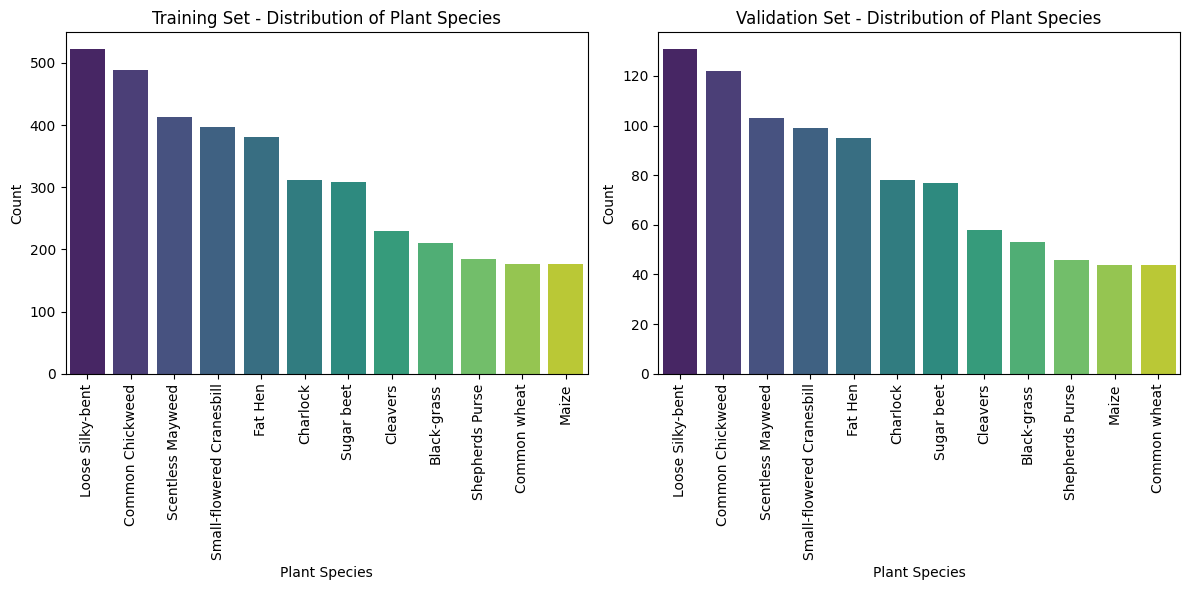

Training Set Label Counts:
 Label
Loose Silky-bent             523
Common Chickweed             489
Scentless Mayweed            413
Small-flowered Cranesbill    397
Fat Hen                      380
Charlock                     312
Sugar beet                   308
Cleavers                     229
Black-grass                  210
Shepherds Purse              185
Common wheat                 177
Maize                        177
Name: count, dtype: int64

Validation Set Label Counts:
 Label
Loose Silky-bent             131
Common Chickweed             122
Scentless Mayweed            103
Small-flowered Cranesbill     99
Fat Hen                       95
Charlock                      78
Sugar beet                    77
Cleavers                      58
Black-grass                   53
Shepherds Purse               46
Maize                         44
Common wheat                  44
Name: count, dtype: int64


In [15]:
# Count the occurrences of each label in the training set
train_label_counts = y_train.value_counts()

# Count the occurrences of each label in the validation set
val_label_counts = y_val.value_counts()

# Plot the distribution of labels in the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette="viridis")
plt.title('Training Set - Distribution of Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Plot the distribution of labels in the validation set
plt.subplot(1, 2, 2)
sns.barplot(x=val_label_counts.index, y=val_label_counts.values, palette="viridis")
plt.title('Validation Set - Distribution of Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Print the label counts
print("Training Set Label Counts:\n", train_label_counts)
print("\nValidation Set Label Counts:\n", val_label_counts)


validatign that the training and validation datasets have the same distribution of observations.

### Encode the target labels

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Display the first few encoded labels to verify
print("First few encoded labels for training set:", y_train_encoded[:10])
print("First few encoded labels for validation set:", y_val_encoded[:10])


First few encoded labels for training set: [ 0  4 10  5 11  8  8  0  9  9]
First few encoded labels for validation set: [ 7 10  3  7  5 11  3  8  3  8]


### Data Normalization

In [17]:
# Normalize the image data
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0

# Verify the normalization by printing the min and max values of the first image in the training set
print("Training set - First image (min and max values):", X_train_normalized[0].min(), X_train_normalized[0].max())

# Verify the normalization by printing the min and max values of the first image in the validation set
print("Validation set - First image (min and max values):", X_val_normalized[0].min(), X_val_normalized[0].max())


Training set - First image (min and max values): 0.015686275 0.5058824
Validation set - First image (min and max values): 0.0 0.63529414


Normalizing the data to help with computational efficincy and avoid exponential growth of large numbers.

## Model Building

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully Connected Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Fully Connected Layer 2
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the input shape and number of classes
input_shape = (64, 64, 3)
num_classes = 12

# Create the model
cnn_model = create_cnn_model(input_shape, num_classes)

# Print the model summary
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(X_train_normalized, y_train_encoded, epochs=20, validation_data=(X_val_normalized, y_val_encoded), callbacks=[early_stopping])


Epoch 1/20
119/119 [==============================] - 8s 14ms/step - loss: 2.4556 - accuracy: 0.1095 - val_loss: 2.3930 - val_accuracy: 0.1600
Epoch 2/20
119/119 [==============================] - 1s 7ms/step - loss: 2.2683 - accuracy: 0.2253 - val_loss: 1.9404 - val_accuracy: 0.3358
Epoch 3/20
119/119 [==============================] - 1s 7ms/step - loss: 1.9274 - accuracy: 0.3353 - val_loss: 1.7129 - val_accuracy: 0.4116
Epoch 4/20
119/119 [==============================] - 1s 7ms/step - loss: 1.7960 - accuracy: 0.3834 - val_loss: 1.5818 - val_accuracy: 0.4526
Epoch 5/20
119/119 [==============================] - 1s 8ms/step - loss: 1.6702 - accuracy: 0.4066 - val_loss: 1.4523 - val_accuracy: 0.4916
Epoch 6/20
119/119 [==============================] - 1s 9ms/step - loss: 1.5552 - accuracy: 0.4637 - val_loss: 1.3944 - val_accuracy: 0.5274
Epoch 7/20
119/119 [==============================] - 1s 8ms/step - loss: 1.4995 - accuracy: 0.4889 - val_loss: 1.2660 - val_accuracy: 0.6084
Epoch

In [20]:
# Evaluate the model on the validation set
val_loss, val_accuracy = cnn_model.evaluate(X_val_normalized, y_val_encoded)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


30/30 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.7463
Validation Loss: 0.783502459526062
Validation Accuracy: 0.7463157773017883


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict the labels for the validation set
y_val_pred = cnn_model.predict(X_val_normalized)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Calculate precision, recall, f1-score
report = classification_report(y_val_encoded, y_val_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


30/30 [==============================] - 0s 2ms/step
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        53
                 Charlock       0.86      0.87      0.87        78
                 Cleavers       0.67      0.83      0.74        58
         Common Chickweed       0.92      0.89      0.90       122
             Common wheat       0.50      0.11      0.19        44
                  Fat Hen       0.74      0.81      0.77        95
         Loose Silky-bent       0.60      0.95      0.73       131
                    Maize       0.80      0.80      0.80        44
        Scentless Mayweed       0.66      0.75      0.70       103
          Shepherds Purse       0.70      0.41      0.52        46
Small-flowered Cranesbill       0.93      0.86      0.89        99
               Sugar beet       0.78      0.79      0.79        77

                 accuracy                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


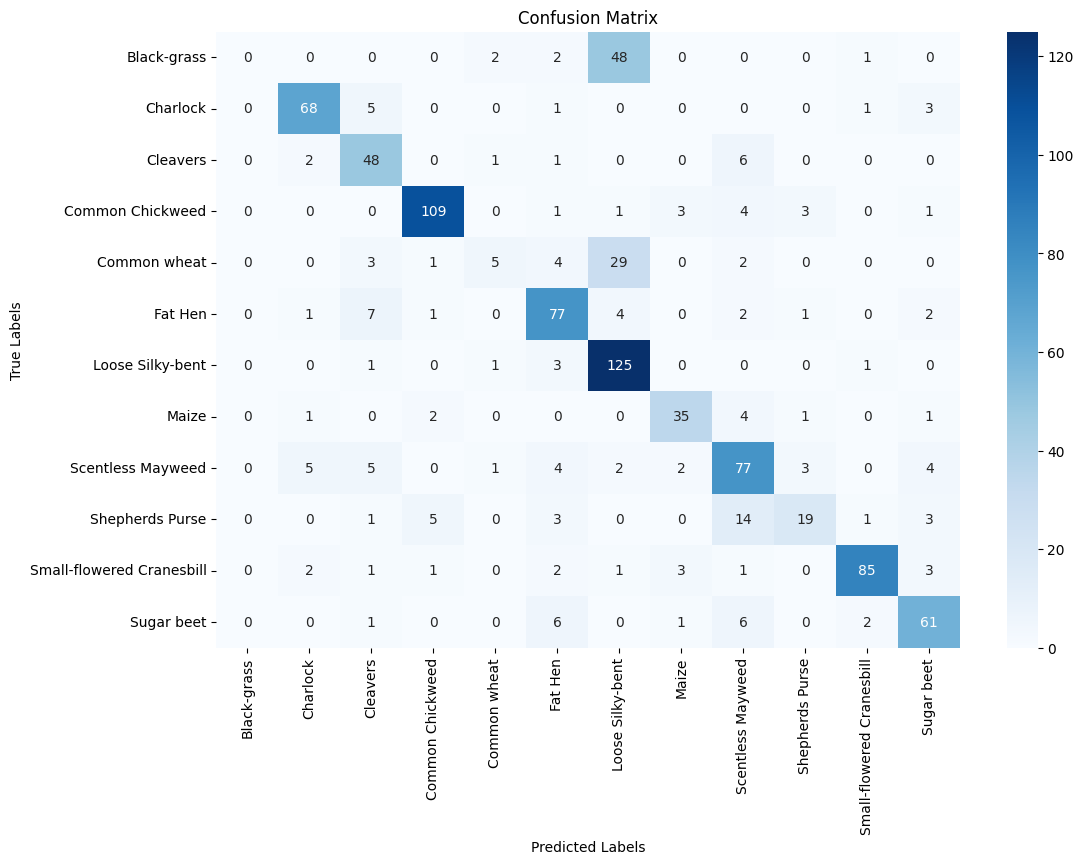

In [22]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


The model did not predict any Black-grass species and mistook them for Loose Silky-bent. This is likely due to the similarity of the two species and more than double the observations of Loose Silky-bent vs Black-grass - causing the model to overtrain on the Loose Silky-bent species. The same can be said for the low accuracy for Common Wheat  

In [23]:
# Check the distribution of Loose Silky-bent and Black-grass in the training set
print("Training set - Loose Silky-bent count:", (y_train == "Loose Silky-bent").sum())
print("Training set - Black-grass count:", (y_train == "Black-grass").sum())

# Check the distribution of Loose Silky-bent and Black-grass in the validation set
print("Validation set - Loose Silky-bent count:", (y_val == "Loose Silky-bent").sum())
print("Validation set - Black-grass count:", (y_val == "Black-grass").sum())


Training set - Loose Silky-bent count: 523
Training set - Black-grass count: 210
Validation set - Loose Silky-bent count: 131
Validation set - Black-grass count: 53


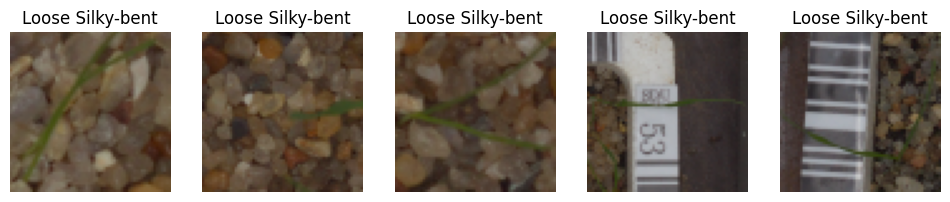

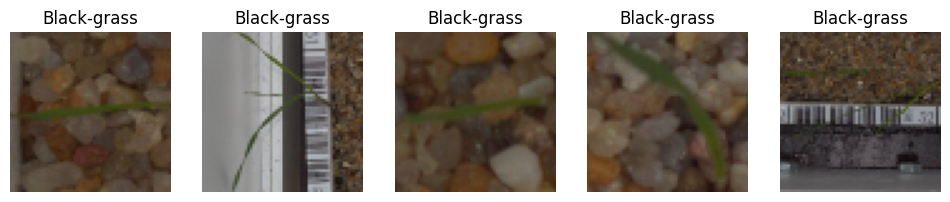

In [24]:
# Visualize some Loose Silky-bent images
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_normalized[y_train == "Loose Silky-bent"][i])
    plt.title("Loose Silky-bent")
    plt.axis('off')
plt.show()

# Visualize some Black-grass images
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_normalized[y_train == "Black-grass"][i])
    plt.title("Black-grass")
    plt.axis('off')
plt.show()


Comparing these species again to highlight thier similarity - espcially at lower resolutions. I suspect there is a tradeoff in accuracy as resolution lowers.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [25]:
from tensorflow.keras import backend as K

# Clear the memory of the first model
K.clear_session()


In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Clear the memory of the first model
K.clear_session()

# Define the improved CNN model
def create_improved_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the input shape and number of classes
input_shape = (64, 64, 3)
num_classes = 12

# Create the improved model
improved_cnn_model = create_improved_cnn_model(input_shape, num_classes)

# Print the model summary
improved_cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.02,
    height_shift_range=0.02,
    zoom_range=0.02,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train_normalized)


In [28]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train_encoded),
                                                  y=y_train_encoded)

class_weights_dict = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0}

print("Class Weights:", class_weights_dict)


Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0}


Balancing weights to overcome the observation imblance in the model.

In [29]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define reduce learning rate on plateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with both callbacks
history = improved_cnn_model.fit(datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
                                 epochs=20,
                                 validation_data=(X_val_normalized, y_val_encoded),
                                 class_weight=class_weights_dict,
                                 callbacks=[early_stopping, reduce_lr])

Epoch 1/20
119/119 [==============================] - 11s 66ms/step - loss: 2.4394 - accuracy: 0.1366 - val_loss: 2.3894 - val_accuracy: 0.1495 - lr: 1.0000e-04
Epoch 2/20
119/119 [==============================] - 5s 41ms/step - loss: 2.2198 - accuracy: 0.2561 - val_loss: 1.9672 - val_accuracy: 0.3189 - lr: 1.0000e-04
Epoch 3/20
119/119 [==============================] - 7s 56ms/step - loss: 1.9027 - accuracy: 0.3503 - val_loss: 1.6437 - val_accuracy: 0.4116 - lr: 1.0000e-04
Epoch 4/20
119/119 [==============================] - 6s 46ms/step - loss: 1.7302 - accuracy: 0.3900 - val_loss: 1.5628 - val_accuracy: 0.4463 - lr: 1.0000e-04
Epoch 5/20
119/119 [==============================] - 5s 44ms/step - loss: 1.6266 - accuracy: 0.4200 - val_loss: 1.4466 - val_accuracy: 0.4968 - lr: 1.0000e-04
Epoch 6/20
119/119 [==============================] - 8s 65ms/step - loss: 1.5222 - accuracy: 0.4592 - val_loss: 1.4412 - val_accuracy: 0.5084 - lr: 1.0000e-04
Epoch 7/20
119/119 [===================

30/30 [==============================] - 0s 5ms/step - loss: 0.8312 - accuracy: 0.7179
Validation Loss: 0.8312086462974548
Validation Accuracy: 0.7178947329521179
30/30 [==============================] - 0s 4ms/step
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.44      0.08      0.13        53
                 Charlock       0.72      0.85      0.78        78
                 Cleavers       0.83      0.74      0.78        58
         Common Chickweed       0.87      0.92      0.89       122
             Common wheat       0.67      0.09      0.16        44
                  Fat Hen       0.76      0.73      0.74        95
         Loose Silky-bent       0.60      0.95      0.74       131
                    Maize       0.75      0.75      0.75        44
        Scentless Mayweed       0.60      0.77      0.68       103
          Shepherds Purse       0.84      0.46      0.59        46
Small-flowered Cranesb

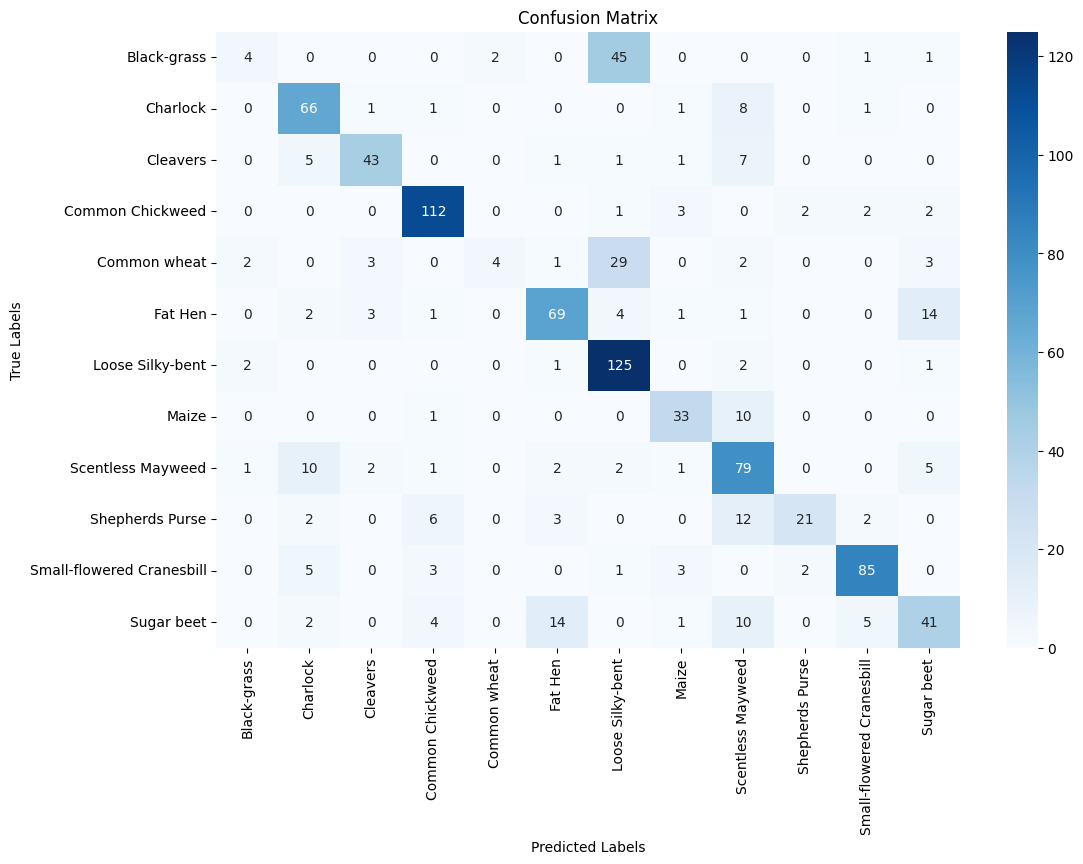

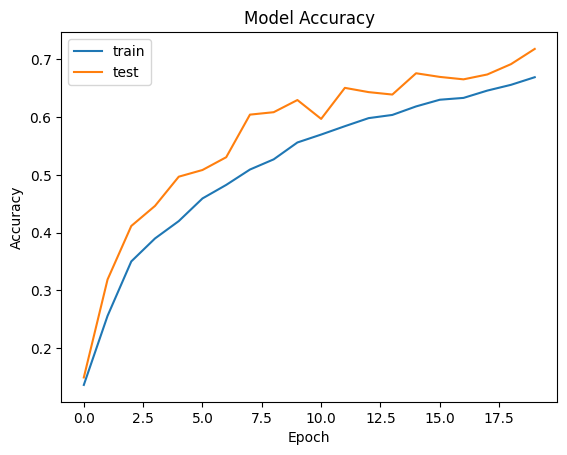

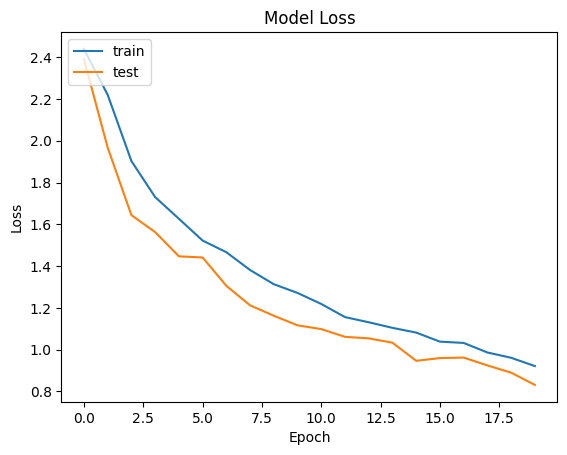

In [30]:
# Evaluate the improved model on the validation set
val_loss, val_accuracy = improved_cnn_model.evaluate(X_val_normalized, y_val_encoded)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict the labels for the validation set
y_val_pred = improved_cnn_model.predict(X_val_normalized)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Calculate precision, recall, f1-score
report = classification_report(y_val_encoded, y_val_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Model Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Model Loss')
plt.show()

The updated model is better at distinguishing Common Wheat and Black-grass from the Loose Silky-bent, but still large room for improvement. Improved prediction across other species as well.   

### Visualizing the prediction

## Actionable Insights and Business Recommendations

* For model improvement, I would recommend increasing the resolution of the images so the model can pick up more subtle nuances between species. However, higher resolution does increase the possibiliuty of overfitting - so be extra vigilent in monitoring the perfomance of train vs validaiton. I woudl also recommend increasing the observations for low obsveration species to corret the imbalnce in the data.

* The updated balanced model does a fair job of predicting most plant species with an F1 score between .77 and .80. Common Wheat and Black-grass are the to bottom performers given thier low sample size and similarity to the Loose Silky-bent species.   

_____

In [31]:
!jupyter nbconvert --to html '/content/drive/MyDrive/colabnotebooks/cnn_cv_plants/CV_CNN_Full_Code_Bingham.ipynb' --output '/content/drive/MyDrive/colabnotebooks/cnn_cv_plants/computer_vision_fullcode_bingham.html'

[NbConvertApp] Converting notebook /content/drive/MyDrive/colabnotebooks/cnn_cv_plants/CV_CNN_Full_Code_Bingham.ipynb to html
[NbConvertApp] Writing 1404832 bytes to /content/drive/MyDrive/colabnotebooks/cnn_cv_plants/computer_vision_fullcode_bingham.html
